## Install requirements:


In [ ]:
!git clone 'https://github.com/MSaidKartal/xrays-and-gradcam.git' && cd ../
#!pip install -r xrays-and-gradcam/requirements.txt

Cloning into 'xrays-and-gradcam'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 190 (delta 84), reused 126 (delta 36), pack-reused 0
Receiving objects: 100% (190/190), 6.33 MiB | 2.65 MiB/s, done.
Resolving deltas: 100% (84/84), done.


# Preamble: Understanding AI in Radiology through Deep Learning

Welcome to our interactive workshop designed for radiologists aiming to bridge the gap between artificial intelligence and clinical practice. In this session, we delve into the world of Convolutional Neural Networks (CNNs) and explainable AI, focusing on the application and interpretation of deep learning models in the diagnosis of COVID-19 using chest X-rays.

## Workshop Overview

Our journey will encompass a hands-on exploration of the key concepts and technologies that are reshaping the landscape of medical imaging:

- **Deep Learning Fundamentals**: We begin by demystifying CNNs, the backbone of many modern image recognition tasks, illuminating their inner workings and the principles behind their remarkable capabilities.
- **Dataset Preparation**: Understanding and organizing data is crucial. We'll walk through the steps of setting up a dataset for a deep learning project, emphasizing the importance of dividing data into training, validation, and testing sets for a robust model evaluation.
- **Model Training and Evaluation**: Step-by-step, we will build, train, and assess a CNN model, examining its performance metrics to understand the implications of model accuracy and reliability in a clinical setting.
- **XAI - Explainable AI in Radiology**: We introduce Grad-CAM as a tool for enhancing the transparency of CNN decisions, providing visual explanations that highlight the model's reasoning, and fostering trust in AI-assisted diagnostics.

## Our Goals

By the end of this workshop, you will:

- Acquire a practical understanding of how CNNs can be trained to classify COVID-19 cases from chest X-ray images.
- Learn to utilize explainable AI techniques like Grad-CAM to interpret model predictions.
- Gain the skills to assess the clinical relevance of AI findings, ensuring the alignment of model focus with the radiologically significant features of the image.

We aim to provide a balanced understanding that combines the technical aspects of deep learning with the clinical intuition of radiology, empowering you to harness AI responsibly and effectively in your practice.

## Workshop Structure

The workshop is structured in a way to encourage interaction, discussion, and hands-on experience:

- **Code Snippets**: We'll provide code snippets to illustrate the steps in building and training a CNN, explaining each section's purpose and its place in the larger context of the model's architecture.
- **Educational Comments**: Alongside the code, you will find detailed comments that explain the rationale behind the choices made and offer insights into how these steps relate to clinical applications.
- **Interactive Sessions**: Participants are encouraged to engage with the material, ask questions, and even experiment with the code to solidify their understanding.

We look forward to guiding you through this exciting intersection of radiology and artificial intelligence, equipping you with the knowledge and tools to become an informed user and advocate for AI in medical imaging.


# Environment Setup and Data Preprocessing

Before diving into the convolutional neural network (CNN) architecture and the training process, it is essential to set up the environment properly and prepare the data for the model. The following code block performs the initial steps necessary for any deep learning task:

In [ ]:
# Import necessary packages and modules for the deep learning workflow.

import os  # Provides functions to interact with the operating system.
import torch  # PyTorch, a deep learning framework for tensor computation with GPU acceleration.
import torchvision.transforms as transforms  # Transforms are common image transformations.
import torchvision.datasets as datasets  # Datasets contains common public datasets.

import numpy as np  # NumPy is a library for scientific computing in Python.
import matplotlib.pyplot as plt  # Matplotlib's pyplot is used for plotting graphs and images.


# Download the dataset and the pretrained model

I have put the preprocessed version of the dataset and the pretrained model in a public huggingface dataset repository. You can download them with the below commands.


In [ ]:
if not os.path.exists('data'): # download data if it doesn't exist
    # download data
    !wget -q https://huggingface.co/datasets/msaidkartal/xrays-and-gradcam/resolve/main/data.zip
    # unzip data
    !unzip -q data.zip

# -q flag means quiet, so you won't see any output

In [ ]:
# Define dictionary paths for the training, validation, and test datasets.
# These paths point to the respective directories where the chest X-ray images are stored.
dirs = {
    'train': 'data/COVID-19_Radiography_Dataset/train',
    'val': 'data/COVID-19_Radiography_Dataset/val',
    'test': 'data/COVID-19_Radiography_Dataset/test'
}

# Load the training dataset from the specified directory, applying a transformation to convert images to PyTorch tensors.
train_set = datasets.ImageFolder(root=dirs['train'], transform=transforms.ToTensor())

# Load the validation dataset in the same manner as the training set.
val_set = datasets.ImageFolder(root=dirs['val'], transform=transforms.ToTensor())

# Load the test dataset, which will be used to evaluate the model's performance after training.
test_set = datasets.ImageFolder(root=dirs['test'], transform=transforms.ToTensor())

# Create a DataLoader for the training set, which allows for easy batching, shuffling, and parallel loading using workers.
# The batch size is set to 64, which is a common choice for training on moderate-sized datasets.
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)


In [ ]:
train_set.classes

['covid_19', 'lung_opacity', 'normal', 'pneumonia']

In [ ]:
train_set.class_to_idx

{'covid_19': 0, 'lung_opacity': 1, 'normal': 2, 'pneumonia': 3}

In [ ]:
# @title
print(f'Number of Images in Train Set: {len(train_set)}')
print(f'Number of Images in Validation Set: {len(val_set)}')
print(f'Number of Images in Test Set: {len(test_set)}')

Number of Images in Train Set: 20685
Number of Images in Validation Set: 240
Number of Images in Test Set: 240


In [ ]:
print(f'Number of Images in Train Set: {len("fill here")}')
print(f'Number of Images in Validation Set: {len("fill here")}')
print(f'Number of Images in Test Set: {len("fill here")}')

Number of Images in Train Set: 20685
Number of Images in Validation Set: 240
Number of Images in Test Set: 240


# Sample Image Visualization

The code below is designed to show a selection of chest X-ray images from the training set, along with their respective labels. This helps in getting a quick visual confirmation of the data we are using to train the CNN model for COVID classification.

- We start by extracting a batch of images and labels from the training loader.
- We then convert these images into a displayable format and plot one image for each class label present in the batch.
- A figure is generated with subplots—each representing a class of images in the dataset (here, we assume there are four classes, such as COVID-19, normal, viral pneumonia, and bacterial pneumonia).
- For each class, we display the first image of that class found in the batch, with the axes turned off for a cleaner look.
- The title above each image indicates the class it belongs to, providing clear identification.

This visual inspection is crucial to confirm that our dataset contains correctly labeled, diverse, and representative images for each category the CNN will be trained to recognize.


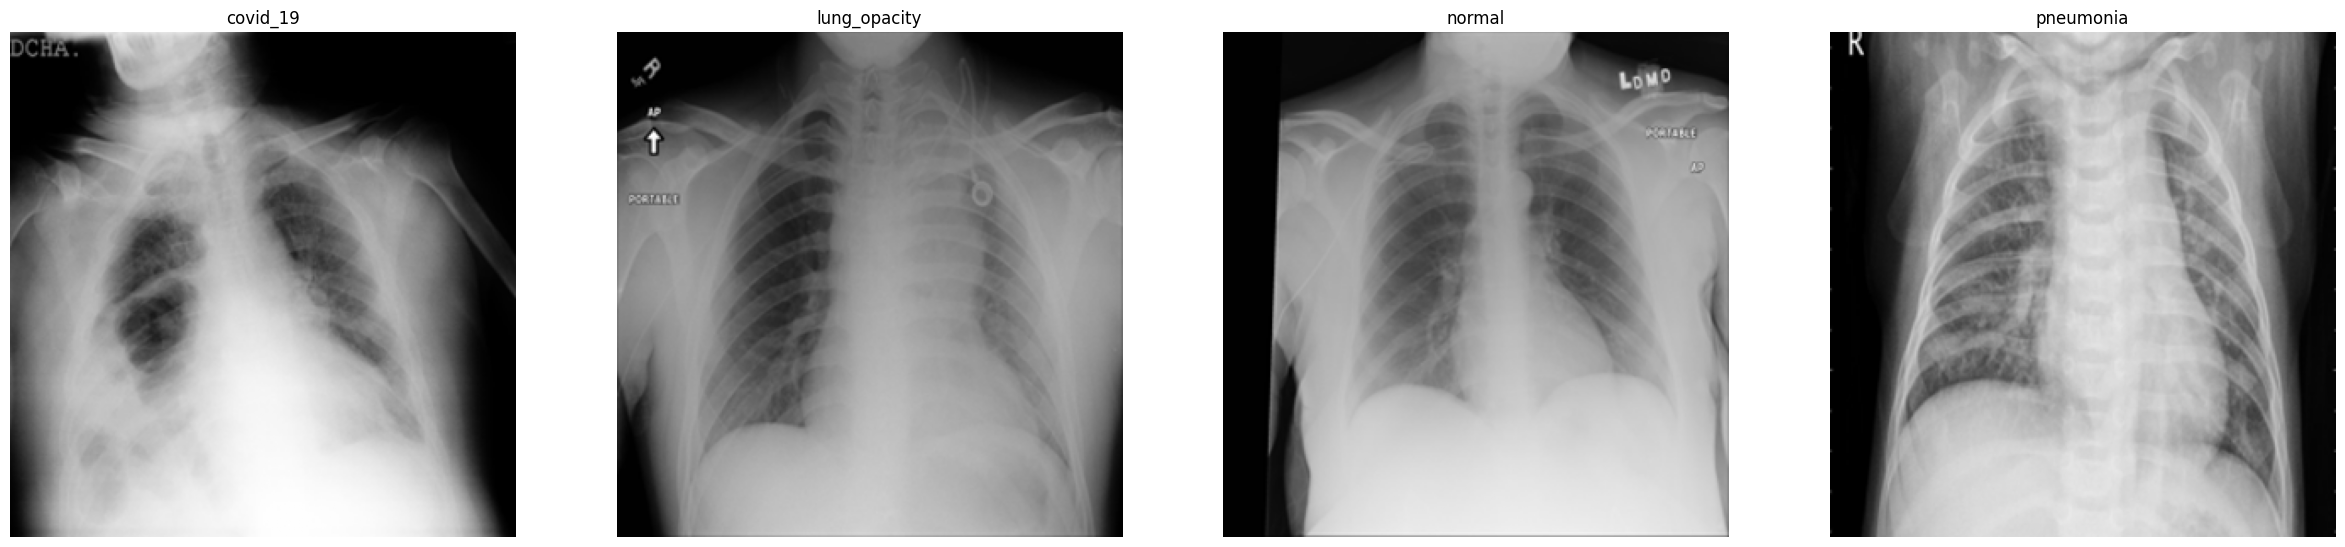

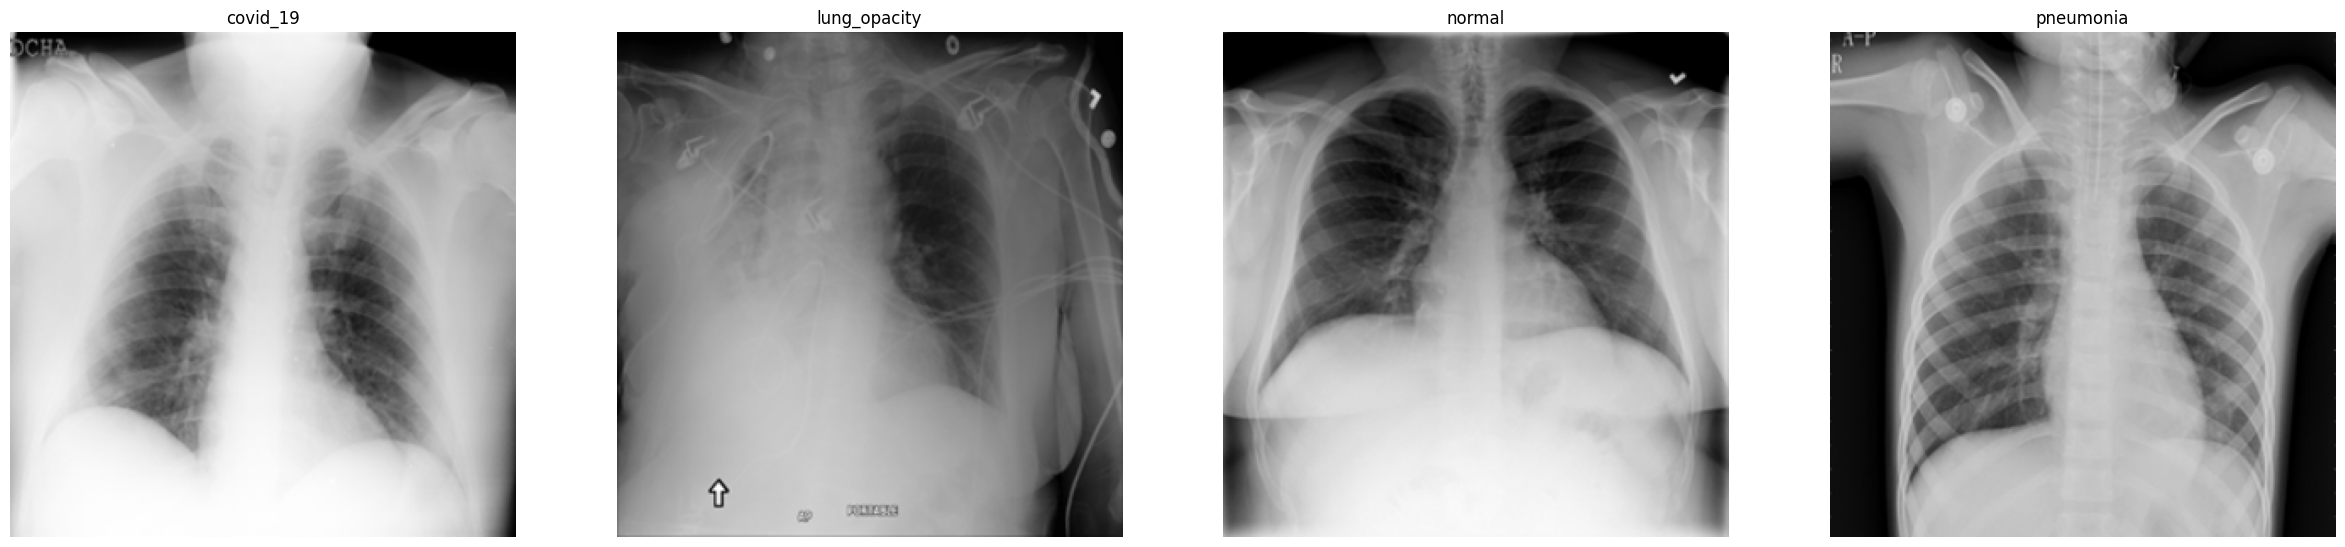

In [ ]:
# @title
for k in range(2):
  images, labels = next(iter(train_loader))
  images = images.numpy()

  # Create a figure by specifying plt.figure, figsize.
  fig = plt.figure(figsize=(30, 10))
  # Create as many loops as the number of classes, there are 4 classes here.
  for i in range(4):  # For classes 0, 1, 2 and 3
      # For each class, we get the index of the first image in the labels array
      index = np.where(labels == i)[0][0]  # We get the first index for each class

      # Create a subplot for each class.
      ax = fig.add_subplot(1, 4, i+1)
      ax.axis('off')

      # Change the axes to display the image properly.
      image = np.squeeze(np.transpose(images[index], (1, 2, 0)))

      # Draw the image
      ax.imshow(image)

      # Set titles for each subplot
      ax.set_title(train_set.classes[labels[index].item()])

  # Show the figure
  plt.show()
  plt.close(fig)


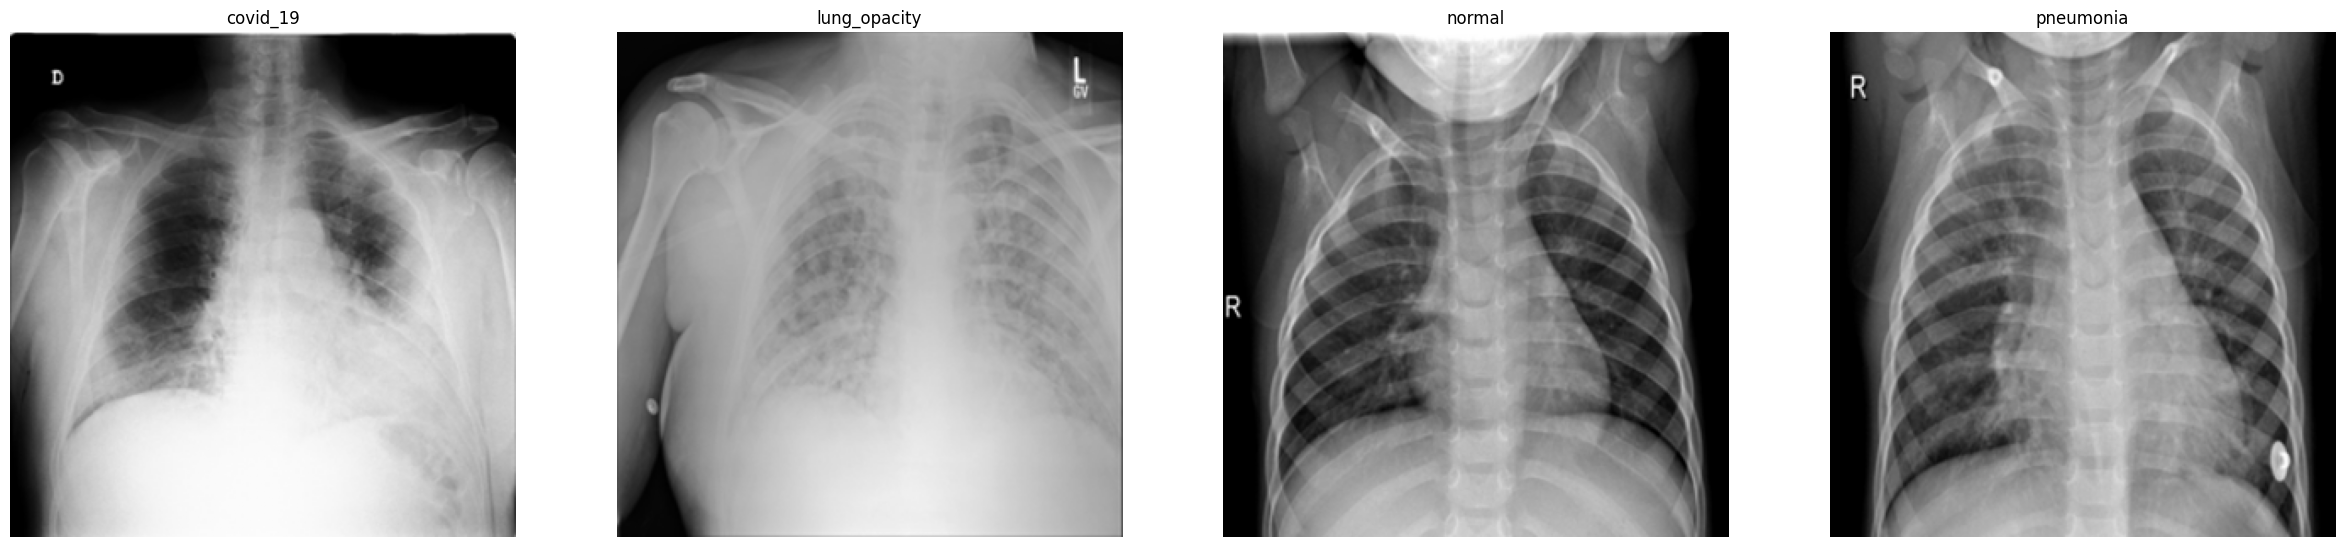

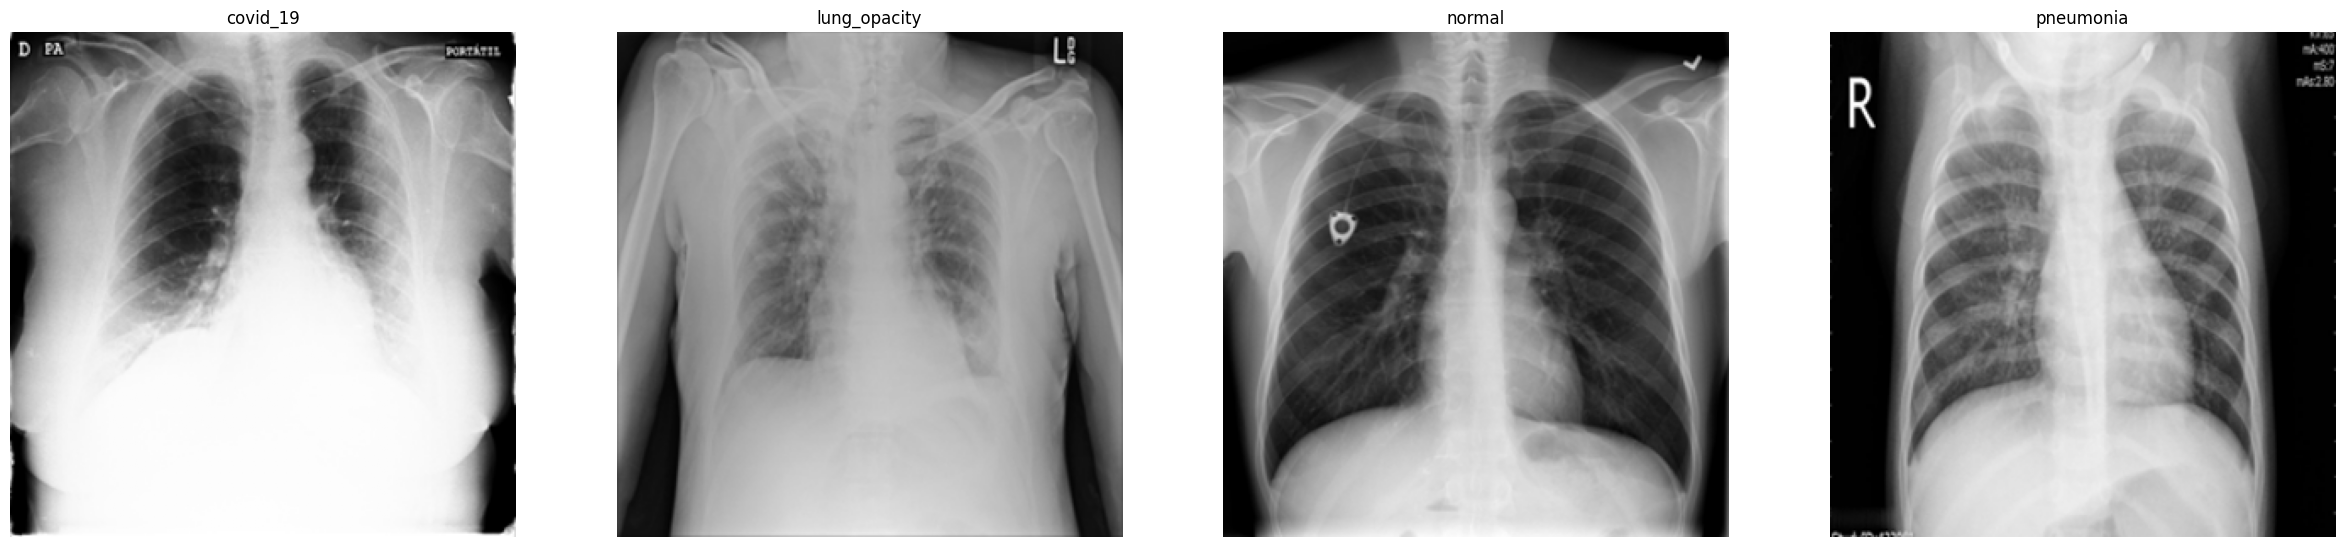

In [ ]:
for k in range(2):
  images, labels = next(iter(train_loader))
  images = images.numpy()

  # Create a figure by specifying plt.figure, figsize.
  fig = plt.figure(figsize=(30, 10))
  # Create as many loops as the number of classes, there are 4 classes here.
  for i in range(4):  # For classes 0, 1, 2 and 3
      # For each class, we get the index of the first image in the labels array
      index = np.where(labels == i)[0][0]  # We get the first index for each class

      # Create a subplot for each class.
      ax = fig.add_subplot(1, 4, i+1)
      ax.axis('off')

      # Change the axes to display the image properly.
      image = np.squeeze(np.transpose(images[index], (1, 2, 0)))

      # Draw the image
      ax.imshow("fill here")

      # Set titles for each subplot
      ax.set_title(train_set.classes[labels[index].item()])

  # Show the figure
  plt.show()
  plt.close(fig)


# Dataset Class Distribution Analysis

To ensure that our deep learning model is not biased towards any particular class, it is important to analyze the distribution of classes across our datasets. The code snippet provided calculates the frequency of each class label in the training, validation, and test sets.

- `freq_train`, `freq_val`, and `freq_test`: These variables store the count of each class in the respective datasets by using the `.bincount()` method on the targets (labels). This method counts the number of occurrences of each value in an array of non-negative ints.
- `freq_all`: By summing the individual frequencies from all three sets, we obtain the total frequency of each class across the entire dataset.

Understanding the frequency of each class helps in identifying any imbalances that could potentially affect the training outcome. It is crucial for deciding if class weighting or resampling techniques might be necessary to ensure fair representation during the model learning process.


In [ ]:
freq_train = torch.as_tensor(train_set.targets).bincount()
freq_val = torch.as_tensor(val_set.targets).bincount()
freq_test = torch.as_tensor(test_set.targets).bincount()
freq_all = freq_train + freq_test + freq_val

In [ ]:
def log_freq(dset, dfreq):
    for c, i in dset.class_to_idx.items():
        print(f'Number of {c.capitalize()} X-Rays: {dfreq[i].item()}')

In [ ]:
print('========== Train Set ==========')
log_freq(train_set, freq_train)
print('======== Validation Set ========')
log_freq(val_set, freq_val)
print('=========== Test Set ===========')
log_freq(test_set, freq_test)

========== Train Set ==========
Number of Covid_19 X-Rays: 3496
Number of Lung_opacity X-Rays: 5892
Number of Normal X-Rays: 10072
Number of Pneumonia X-Rays: 1225
======== Validation Set ========
Number of Covid_19 X-Rays: 60
Number of Lung_opacity X-Rays: 60
Number of Normal X-Rays: 60
Number of Pneumonia X-Rays: 60
=========== Test Set ===========
Number of Covid_19 X-Rays: 60
Number of Lung_opacity X-Rays: 60
Number of Normal X-Rays: 60
Number of Pneumonia X-Rays: 60


<ipython-input-11-2495ee1b2a87>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-notebook')


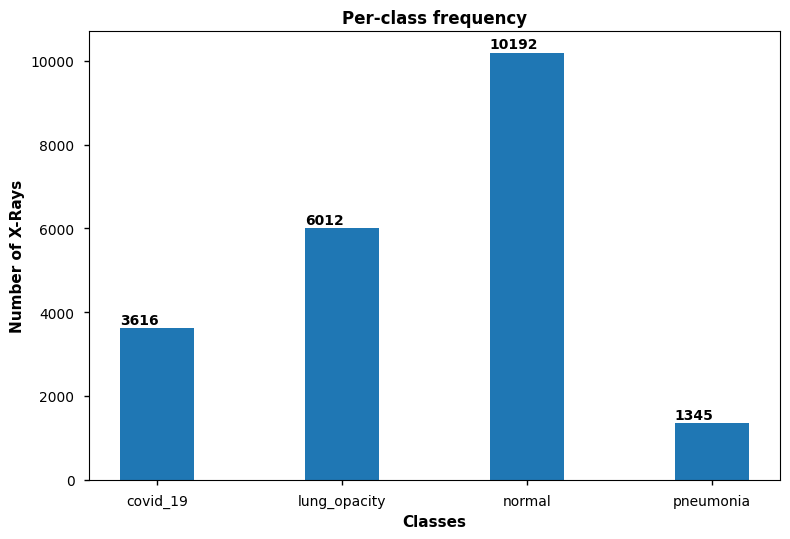

In [ ]:
# Apply 'seaborn-notebook' style for consistent and visually appealing plots.
plt.style.use('seaborn-notebook')

# Create a bar plot showing the distribution of classes (e.g., 'COVID' vs 'Non-COVID') in the training dataset.
plt.bar(train_set.classes, freq_all.numpy(), width=0.4)

# Iterate over each class frequency to add the exact count above its corresponding bar for clarity.
for i, v in enumerate(freq_all.numpy()):
    plt.text(i - .2, v + 100, str(v), fontweight='bold')

# Label the x-axis as 'Classes' to signify different categories in the dataset.
plt.xlabel('Classes', fontweight='bold')
# Label the y-axis as 'Number of X-Rays' to reflect the count of images per class.
plt.ylabel('Number of X-Rays', fontweight='bold')
# Add a title 'Per-class frequency' to describe what the bar plot represents.
plt.title('Per-class frequency', fontweight='bold')

# Adjust layout to ensure there's no clipping of labels or titles in the plot.
plt.tight_layout()
# Uncomment the next line if you wish to save the plot as an image file in the specified directory.
# plt.savefig('outputs/images/class_freq.png')

# Display the plot to show the class frequency distribution.
plt.show()
# Close the plot to free up memory resources as it is no longer needed after displaying.
plt.close()

```markdown
# Integration of Utility Modules and Grad-CAM

To augment our deep learning pipeline with advanced visualization and analysis capabilities, we will include a set of custom utility modules. Additionally, we will integrate Grad-CAM, a technique for highlighting the regions in our input images that are critical for predictions by the CNN.

- `sys.path.append(...)`: This line adds the directory containing our custom modules to the system path, making it accessible to Python.
- The `utils` and `networks` modules typically contain helper functions and predefined neural network architectures, respectively, which are essential for building and training our models.
- `GradCAM` and `plot_utils` import specific functionality for generating Grad-CAM visualizations (`GradCAM`) and plotting confusion matrices and other plots (`plot_confmat`, `plot_gradcam`), which are valuable for interpreting the model's performance and decision-making process.
- We re-import `torch` and `torchvision.datasets` as well as `DataLoader` for completeness and to ensure that all necessary components for data handling and model operations are available in the current context.

The inclusion of these utilities sets the stage for implementing effective deep learning workflows tailored for radiological image analysis, while also facilitating the interpretability of the model's predictions through visual explanations.
```

This section is streamlined to focus on the relevance of the imported modules and techniques to the core objective of the workshop, ensuring that participants understand their role in the deep learning framework being demonstrated.

In [ ]:
import sys
sys.path.append("xrays-and-gradcam/")

import utils
import networks
from grad_cam import GradCAM
from plot_utils import plot_confmat, plot_gradcam

import torch
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Preparing Datasets and DataLoaders for Evaluation

For the evaluation phase of our deep learning model, it is essential to prepare our validation and test sets with the appropriate transformations, and to set up DataLoaders that will streamline the process of passing data through the model.

- The validation (`val_set`) and test (`test_set`) datasets are created using `ImageFolder` with directory paths and transforms defined in the `utils` module. The `transform['eval']` specifies the transformations that should be applied to the datasets during the evaluation phase, such as resizing, normalization, etc., which must be consistent with the transformations applied during training.
- `DataLoader` objects for the training, validation, and test sets (`train_dl`, `val_dl`, `test_dl`) are instantiated with a specified `batch_size`. This controls how many images are processed at once during model evaluation. It's important that the batch size fits within your hardware's memory constraints while being large enough for efficient processing.

By structuring our data this way, we ensure that the model is evaluated under conditions that match the training phase as closely as possible, allowing for accurate assessment of the model's performance.


In [ ]:
# @title
val_set = datasets.ImageFolder(root=utils.dirs['val'], transform=utils.transform['eval'])
test_set = datasets.ImageFolder(root=utils.dirs['test'], transform=utils.transform['eval'])

train_dl = DataLoader(train_set, batch_size=128)
val_dl = DataLoader(val_set, batch_size=128)
test_dl = DataLoader(test_set, batch_size=120)

In [ ]:
val_set = datasets.ImageFolder(root=utils.dirs['val'], transform=utils.transform['eval'])
test_set = datasets.ImageFolder(root=utils.dirs['test'], transform=utils.transform['eval'])

train_dl = DataLoader("fill here", batch_size=128)
val_dl = DataLoader("fill here", batch_size=128)
test_dl = DataLoader("fill here", batch_size=120)

# Transfer Learning Explained

Transfer learning is a powerful technique in deep learning that leverages a pre-trained model as the foundation for a new task. This approach is particularly beneficial when dealing with medical imaging tasks like classifying COVID on chest X-rays, where annotated data can be limited and expensive to acquire.

![im](./assets/TL1.png)
## Understanding Transfer Learning

In the context of Convolutional Neural Networks (CNNs), a pre-trained model is a network that has been previously trained on a large dataset, typically on a related task such as image recognition on a dataset like ImageNet. This model has learned a rich representation of features that can be effectively transferred to a new task with a different dataset.

Here’s why transfer learning is pivotal for radiologists:

1. **Data Efficiency**: Medical imaging datasets are often smaller compared to the datasets used for training mainstream image recognition models. Transfer learning allows radiologists to work with limited data by utilizing the knowledge the pre-trained model has already acquired.

2. **Time and Resource Savings**: Training a CNN from scratch requires significant computational resources and time. Starting with a model that has already learned generic features can significantly reduce the time and resources needed for training.

3. **Improved Performance**: Pre-trained models have been optimized to a high degree on the tasks they were initially trained for. When fine-tuned for a specific medical imaging task, they can often outperform models trained from scratch, especially when the available training data is limited.

4. **Feature Relevance**: The initial layers of a pre-trained CNN generally capture generic features like edges, textures, and colors. These features are relevant across various tasks, including medical image analysis. The later layers become more specialized. In transfer learning, you can fine-tune these layers to better suit the radiological images and the specific classification task at hand.

## Application in Radiology

For radiologists, the concept of transfer learning can be analogous to a new radiology resident building upon the foundational medical knowledge acquired in medical school and adapting it to the specialized field of radiology. Just as the resident would start diagnosing cases more effectively over time by learning from specific cases in radiology, a CNN adapts to new imaging tasks by learning from specific features in radiological images.

By utilizing transfer learning, radiologists can leverage cutting-edge AI tools without the need to become experts in machine learning. This process allows them to contribute their domain expertise to improve model performance and clinical applicability.

In your hands-on workshop, transfer learning will demonstrate how a model trained on general images can adapt to the specialized task of classifying COVID-19 in chest X-rays, showcasing how deep learning can be harnessed to support diagnostic processes in radiology.


# Insight into VGG16 Architecture

VGG16 has been a monumental architecture in the field of deep learning for image classification and detection. Its simplicity and effectiveness have made it a preferred choice for transfer learning, especially in medical imaging where accurate and detailed feature extraction is crucial.

[!im](./assets/vgg.png)
## Overview of VGG16

- **Definition**: VGG16 is a convolutional neural network model that excels at object detection and classification, distinguishing among 1000 different categories with a remarkable accuracy rate.
- **Nomenclature**: The term 'VGG16' is derived from the Visual Geometry Group at the University of Oxford, indicating that the network is 16 layers deep.
- **Origins**: The model was introduced in the seminal paper "Very Deep Convolutional Networks for Large-Scale Image Recognition" in 2014, and since then, it has become a staple in the deep learning community.

## Characteristics of VGG16

- **Architecture**: The architecture of VGG16 is a paragon of simplicity and depth. It consists of 13 convolutional layers with small 3x3 filters, which allows for capturing complex patterns in the image data, and 3 fully connected layers at the end of the network.
- **Depth**: The '16' in VGG16 refers to the total count of convolutional and fully connected layers that have trainable weights.
- **Performance**: Upon its release, VGG16 made headlines by achieving top-tier performance on the ImageNet challenge, which is a highly regarded benchmark for image classification and vision-related tasks.

## Importance for Radiology

For the radiology community, VGG16 is more than just a deep learning architecture; it represents a significant development in the field of computer-aided diagnosis. The key features of VGG16, such as its deep architecture and the use of small convolutional filters, allow it to extract detailed features from medical images, which is vital for accurate diagnosis. When used as a starting point for transfer learning, VGG16 can be fine-tuned to work with specific imaging data in radiology, such as chest X-rays, to classify conditions with high accuracy.

In our hands-on workshop, you will explore how to utilize VGG16’s transfer learning capabilities to address the challenges of COVID-19 classification in chest X-ray images, highlighting how historical advancements in AI can be directly applied to modern medical challenges.


In [ ]:
# @title
# Load a pre-trained VGG16 model with custom output features, specifically tailored for the dataset at hand.
# Here, 'out_features=4' suggests we are classifying the images into 4 distinct classes.
vgg16 = networks.get_vgg16(out_features=4, path='models/lr3e-5_vgg_cuda.pth')

# Use a utility function to get predictions from the validation dataset using the loaded VGG16 model.
val_preds = utils.get_all_preds(vgg16, val_dl)
# Similarly, obtain predictions from the test dataset to evaluate the model's performance.
test_preds = utils.get_all_preds(vgg16, test_dl)

# Process the predictions from the test dataset to obtain the most likely class for each X-ray.
# The '.cpu()' method is called to move the data from the GPU to CPU memory if CUDA is used for computation.
# The 'argmax(dim=1)' function finds the class with the highest predicted probability for each image.
vgg_preds = test_preds.cpu().argmax(dim=1)

# Print out the shape of the predictions for both validation and test sets.
# This is useful for verification and understanding the dimensions of the model's outputs.
val_preds.shape, test_preds.shape


In [ ]:
# Load a pre-trained VGG16 model with custom output features, specifically tailored for the dataset at hand.
# Here, 'out_features=4' suggests we are classifying the images into 4 distinct classes.
vgg16 = networks.get_vgg16(out_features=4, path='models/lr3e-5_vgg_cuda.pth')

# Use a utility function to get predictions from the validation dataset using the loaded VGG16 model.
val_preds = utils.get_all_preds("fill here", val_dl)
# Similarly, obtain predictions from the test dataset to evaluate the model's performance.
test_preds = utils.get_all_preds("fill here", test_dl)

# Process the predictions from the test dataset to obtain the most likely class for each X-ray.
# The '.cpu()' method is called to move the data from the GPU to CPU memory if CUDA is used for computation.
# The 'argmax(dim=1)' function finds the class with the highest predicted probability for each image.
vgg_preds = test_preds.cpu().argmax(dim=1)

# Print out the shape of the predictions for both validation and test sets.
# This is useful for verification and understanding the dimensions of the model's outputs.
val_preds.shape, test_preds.shape


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


(torch.Size([240, 4]), torch.Size([240, 4]))

In [ ]:
# @title
# Calculate the number of correct predictions in the validation set by comparing the model's predictions
# with the actual targets/labels. The predictions are moved to the same device as the targets for comparison.
val_correct = utils.get_num_correct(val_preds, torch.as_tensor(val_set.targets, device=device))

# Calculate the number of correct predictions in the test set in the same manner as for the validation set.
test_correct = utils.get_num_correct(test_preds, torch.as_tensor(test_set.targets, device=device))

# Print the number of correctly predicted images and the accuracy percentage for the validation set.
# The accuracy is calculated by dividing the number of correct predictions by the total number of images
# and then converting it to a percentage.
print(f'Validation Correct: {val_correct:5}\tValidation Accuracy: {(100*val_correct/len(val_set)):5.2f}%')

# Print the number of correctly predicted images and the accuracy percentage for the test set.
# The formatting ensures that the output is easily readable and provides quick insight into model performance.
print(f'Test Correct: {test_correct:6}\tTest Accuracy: {(100*test_correct/len(test_set)):6.2f}%')


In [ ]:
# Calculate the number of correct predictions in the validation set by comparing the model's predictions
# with the actual targets/labels. The predictions are moved to the same device as the targets for comparison.
val_correct = utils.get_num_correct("fill here", torch.as_tensor(val_set.targets, device=device))

# Calculate the number of correct predictions in the test set in the same manner as for the validation set.
test_correct = utils.get_num_correct("fill here", torch.as_tensor(test_set.targets, device=device))

# Print the number of correctly predicted images and the accuracy percentage for the validation set.
# The accuracy is calculated by dividing the number of correct predictions by the total number of images
# and then converting it to a percentage.
print(f'Validation Correct: {val_correct:5}\tValidation Accuracy: {(100*val_correct/len(val_set)):5.2f}%')

# Print the number of correctly predicted images and the accuracy percentage for the test set.
# The formatting ensures that the output is easily readable and provides quick insight into model performance.
print(f'Test Correct: {test_correct:6}\tTest Accuracy: {(100*test_correct/len(test_set)):6.2f}%')


Validation Correct:   233	Validation Accuracy: 97.08%
Test Correct:    229	Test Accuracy:  95.42%


In [ ]:
# @title
val_confmat = utils.get_confmat(val_set.targets, val_preds)
test_confmat = utils.get_confmat(test_set.targets, test_preds)
plot_confmat(val_confmat, test_confmat, train_set.classes, f'{type(vgg16).__name__.lower()}')

In [ ]:
val_confmat = utils.get_confmat(val_set.targets, "fill here")
test_confmat = utils.get_confmat(test_set.targets, "fill here")
plot_confmat(val_confmat, test_confmat, train_set.classes, f'{type(vgg16).__name__.lower()}')

In [ ]:
results = utils.get_results(test_confmat, test_set.classes)
results

{'covid_19': [0.9956521739130435, 1.0, 0.9833333333333333, 0.9915966386554621],
 'lung_opacity': [0.9581589958158996,
  0.9464285714285714,
  0.8833333333333333,
  0.9137931034482758],
 'normal': [0.9621848739495799, 0.8923076923076924, 0.9666666666666667, 0.928],
 'pneumonia': [0.9913419913419913,
  0.9833333333333333,
  0.9833333333333333,
  0.9833333333333333]}

# Delving into ResNet-18 Architecture

ResNet-18 is a prominent architecture within the deep learning landscape, especially recognized for its innovative approach to handling deeper neural networks through the concept of residual learning.

![im](./assets/resn.png)
## ResNet-18 At a Glance

- **Denotation**: The '18' in ResNet-18 signifies the number of layers it contains, making it a relatively more accessible model within the ResNet family, suitable for a range of computational environments.
- **Inception**: This model was conceived by researchers at Microsoft and shared with the broader academic and professional community through the pivotal paper "Deep Residual Learning for Image Recognition" in 2015.
- **Architecture Fundamentals**: Belonging to the ResNet (Residual Network) series, ResNet-18 implements an innovative design that incorporates 'skip connections'. These connections effectively allow the input of one layer to "skip" computing layers and flow directly into deeper layers within the network.

## The Innovation of Skip Connections

- **Solving Vanishing Gradients**: The skip connections are a breakthrough that mitigates the vanishing gradient issue—a common obstacle in training very deep networks—by allowing gradients to flow through the network without attenuation during backpropagation.
- **Enabling Deeper Networks**: With these residual blocks, ResNet-18 can enjoy the benefits of deeper architectural complexity without the hindrance of training difficulties that typically plague such depth.

## Impact on Radiology

For the radiology sector, ResNet-18's architecture provides an excellent foundation for developing highly accurate diagnostic models. The efficiency of training and the model's adeptness at feature extraction due to its depth make it a valuable tool for medical image analysis, such as in detecting pathologies in chest X-rays or other radiographic imaging.

In the context of your workshop, ResNet-18 serves as a prime example of how advancements in deep learning architecture can facilitate powerful diagnostic aids. The participants will engage with ResNet-18 to understand how it can be utilized for the classification of COVID-19 from chest X-rays, thereby leveraging deep learning to potentially improve patient outcomes and radiological practices.


In [ ]:
# @title
# Initialize a pre-trained ResNet18 model from a saved file, adjusting the final layer to predict 4 output classes.
# This could correspond to different diagnoses or findings in the chest X-rays.
resnet18 = networks.get_resnet18(out_features=4, path='models/lr3e-5_resnet_cuda.pth')

# Obtain predictions from the ResNet18 model for all the images in the validation dataset loader.
# This is an essential step in evaluating the model's performance on unseen data.
val_preds = utils.get_all_preds(resnet18, val_dl)

# Similarly, generate predictions for all the images in the test dataset loader to further evaluate the model.
test_preds = utils.get_all_preds(resnet18, test_dl)

# Process the predictions from the test dataset by selecting the class with the highest probability.
# The use of '.cpu()' is necessary to transfer tensors from GPU to CPU if the model computations are done on a GPU.
resnet_preds = test_preds.cpu().argmax(dim=1)

# Output the shape of the prediction tensors for validation and test datasets.
# The shape will confirm the number of predictions made and if they align with the number of input samples.
val_preds.shape, test_preds.shape


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


(torch.Size([240, 4]), torch.Size([240, 4]))

In [ ]:
# @title
# Initialize a pre-trained ResNet18 model from a saved file, adjusting the final layer to predict 4 output classes.
# This could correspond to different diagnoses or findings in the chest X-rays.
resnet18 = networks.get_resnet18(out_features=4, path='models/lr3e-5_resnet_cuda.pth')

# Obtain predictions from the ResNet18 model for all the images in the validation dataset loader.
# This is an essential step in evaluating the model's performance on unseen data.
val_preds = utils.get_all_preds("fill here", val_dl)

# Similarly, generate predictions for all the images in the test dataset loader to further evaluate the model.
test_preds = utils.get_all_preds("fill here", test_dl)

# Process the predictions from the test dataset by selecting the class with the highest probability.
# The use of '.cpu()' is necessary to transfer tensors from GPU to CPU if the model computations are done on a GPU.
resnet_preds = test_preds.cpu().argmax(dim=1)

# Output the shape of the prediction tensors for validation and test datasets.
# The shape will confirm the number of predictions made and if they align with the number of input samples.
val_preds.shape, test_preds.shape


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


(torch.Size([240, 4]), torch.Size([240, 4]))

In [ ]:
val_correct = utils.get_num_correct(val_preds, torch.as_tensor(val_set.targets, device=device))
test_correct = utils.get_num_correct(test_preds, torch.as_tensor(test_set.targets, device=device))

print(f'Validation Correct: {val_correct:5}\tValidation Accuracy: {(100*val_correct/len(val_set)):5.2f}%')
print(f'Test Correct: {test_correct:6}\tTest Accuracy: {(100*test_correct/len(test_set)):6.2f}%')

Validation Correct:   233	Validation Accuracy: 97.08%
Test Correct:    230	Test Accuracy:  95.83%


In [ ]:
# @title
val_confmat = utils.get_confmat(val_set.targets, val_preds)
test_confmat = utils.get_confmat(test_set.targets, test_preds)
plot_confmat(val_confmat, test_confmat, train_set.classes, f'{type(vgg16).__name__.lower()}')

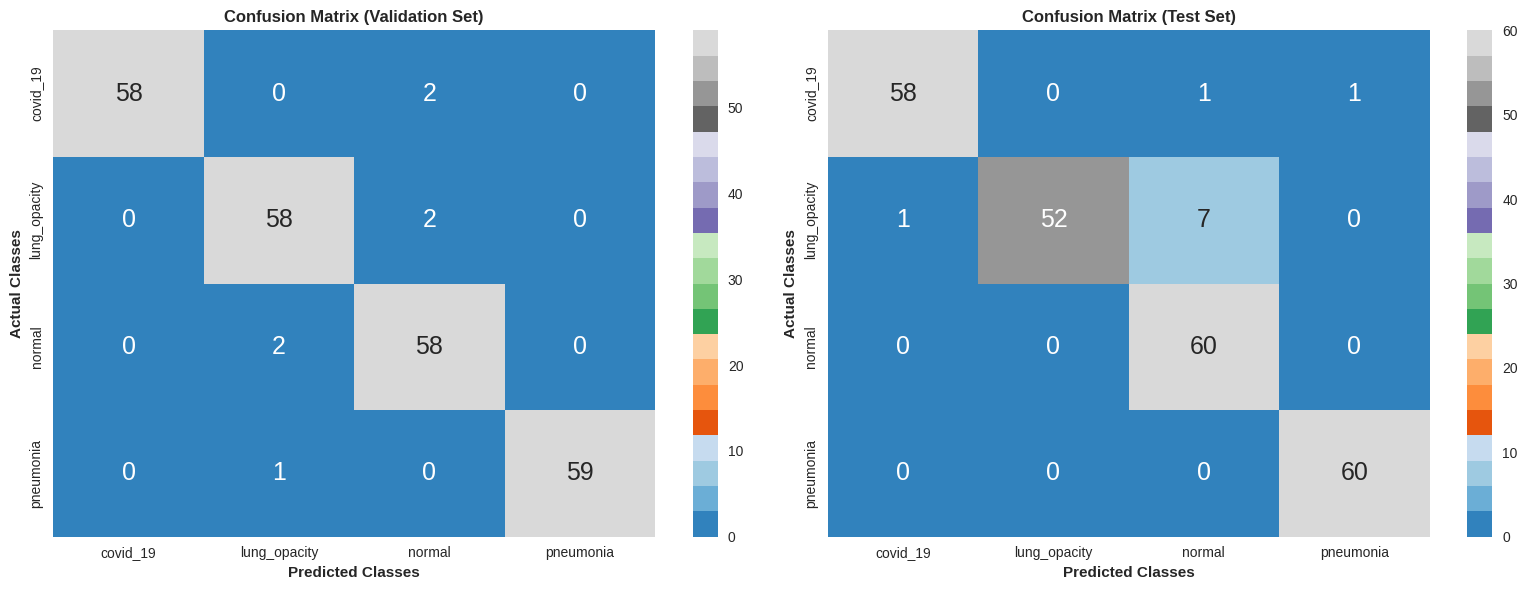

In [ ]:
val_confmat = utils.get_confmat(val_set.targets, "fill here")
test_confmat = utils.get_confmat(test_set.targets, "fill here")
plot_confmat(val_confmat, test_confmat, train_set.classes, f'{type(vgg16).__name__.lower()}')

In [ ]:
results = utils.get_results(test_confmat, test_set.classes)
results

{'covid_19': [0.9956521739130435, 1.0, 0.9833333333333333, 0.9915966386554621],
 'lung_opacity': [0.9581589958158996,
  0.9464285714285714,
  0.8833333333333333,
  0.9137931034482758],
 'normal': [0.9621848739495799, 0.8923076923076924, 0.9666666666666667, 0.928],
 'pneumonia': [0.9913419913419913,
  0.9833333333333333,
  0.9833333333333333,
  0.9833333333333333]}

# Exploring DenseNet-121 Architecture

DenseNet-121 stands out in the realm of deep learning architectures due to its unique design and efficiency, particularly in the context of handling complex image data such as medical imaging.

![im](./assets/dens.png)
## DenseNet-121 Overview

- **Naming Convention**: The "121" in DenseNet121 indicates the number of neural layers that comprise the network, highlighting the depth and complexity of the model.
- **Origins**: The conceptualization of DenseNet121 was first introduced in the research paper "Densely Connected Convolutional Networks" in 2017, marking a significant step forward in convolutional network design.
- **Architectural Innovations**: DenseNet architectures, including DenseNet121, are celebrated for their dense connectivity pattern. Every layer directly connects to every other layer that follows, creating a densely connected web of layers within the network.

## The Dense Connectivity Paradigm

- **Parameter Efficiency**: The dense connections of DenseNet121 significantly reduce the model's parameters compared to other networks with a similar depth. This efficiency enables maintaining or even enhancing model performance while being more economical with resources.
- **Enhanced Feature Propagation**: With each layer receiving input from all preceding layers, there's a richer feature set available at each point, improving information flow and feature reuse throughout the network.
- **Combatting Overfitting**: The inherent feature-rich connectivity of DenseNet121 also helps in reducing overfitting, a common challenge when training deep networks, especially on limited datasets.

## Relevance to Radiology

For radiologists, DenseNet-121 offers a powerful tool for medical image classification. Its parameter efficiency and deep structure are well-suited for capturing the nuanced patterns present in complex radiographic images. When applied to chest X-ray analysis, DenseNet-121 could enhance the accuracy of identifying and classifying pathologies, including those associated with COVID-19, which may be subtle and dispersed across the image.

The participants of your workshop will gain insights into how DenseNet-121's architecture is particularly advantageous in the medical field. By examining its use for COVID-19 classification in chest X-rays, they will learn about the cutting-edge of deep learning technology that has the potential to revolutionize medical diagnostics.


In [ ]:
# @title
# Initialize a DenseNet121 model tailored for the task with 4 output features (e.g., classification categories).
# The model weights are loaded from a saved path, indicating a pre-trained state or previous training session.
densenet121 = networks.get_densenet121(out_features=4, path='models/lr3e-5_densenet_cuda.pth')

# Generate predictions on the validation dataset using the DenseNet121 model. This step is critical for
# preliminary assessment of the model's performance on data it hasn't been trained on.
val_preds = utils.get_all_preds(densenet121, val_dl)

# Repeat the prediction process for the test dataset. Comparing validation and test predictions can
# help in understanding how well the model generalizes to completely unseen data.
test_preds = utils.get_all_preds(densenet121, test_dl)

# Extract the predicted class indices from the test predictions by taking the argmax,
# which represents the most likely class according to the model's output.
densenet_preds = test_preds.cpu().argmax(dim=1)

# Display the shapes of the prediction tensors for both the validation and test sets.
# This information confirms the number of predictions and ensures they correspond to
# the number of samples in each respective dataset.
val_preds.shape, test_preds.shape


(torch.Size([240, 4]), torch.Size([240, 4]))

In [ ]:
# Initialize a DenseNet121 model tailored for the task with 4 output features (e.g., classification categories).
# The model weights are loaded from a saved path, indicating a pre-trained state or previous training session.
densenet121 = networks.get_densenet121(out_features=4, path='models/lr3e-5_densenet_cuda.pth')

# Generate predictions on the validation dataset using the DenseNet121 model. This step is critical for
# preliminary assessment of the model's performance on data it hasn't been trained on.
val_preds = utils.get_all_preds("fill here", val_dl)

# Repeat the prediction process for the test dataset. Comparing validation and test predictions can
# help in understanding how well the model generalizes to completely unseen data.
test_preds = utils.get_all_preds("fill here", test_dl)

# Extract the predicted class indices from the test predictions by taking the argmax,
# which represents the most likely class according to the model's output.
densenet_preds = test_preds.cpu().argmax(dim=1)

# Display the shapes of the prediction tensors for both the validation and test sets.
# This information confirms the number of predictions and ensures they correspond to
# the number of samples in each respective dataset.
val_preds.shape, test_preds.shape


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


(torch.Size([240, 4]), torch.Size([240, 4]))

In [ ]:
val_correct = utils.get_num_correct(val_preds, torch.as_tensor(val_set.targets, device=device))
test_correct = utils.get_num_correct(test_preds, torch.as_tensor(test_set.targets, device=device))

print(f'Validation Correct: {val_correct:5}\tValidation Accuracy: {(100*val_correct/len(val_set)):5.2f}%')
print(f'Test Correct: {test_correct:6}\tTest Accuracy: {(100*test_correct/len(test_set)):6.2f}%')

Validation Correct:   227	Validation Accuracy: 94.58%
Test Correct:    230	Test Accuracy:  95.83%


In [ ]:
# @title
val_confmat = utils.get_confmat(val_set.targets, val_preds)
test_confmat = utils.get_confmat(test_set.targets, test_preds)
plot_confmat(val_confmat, test_confmat, train_set.classes, f'{type(vgg16).__name__.lower()}')

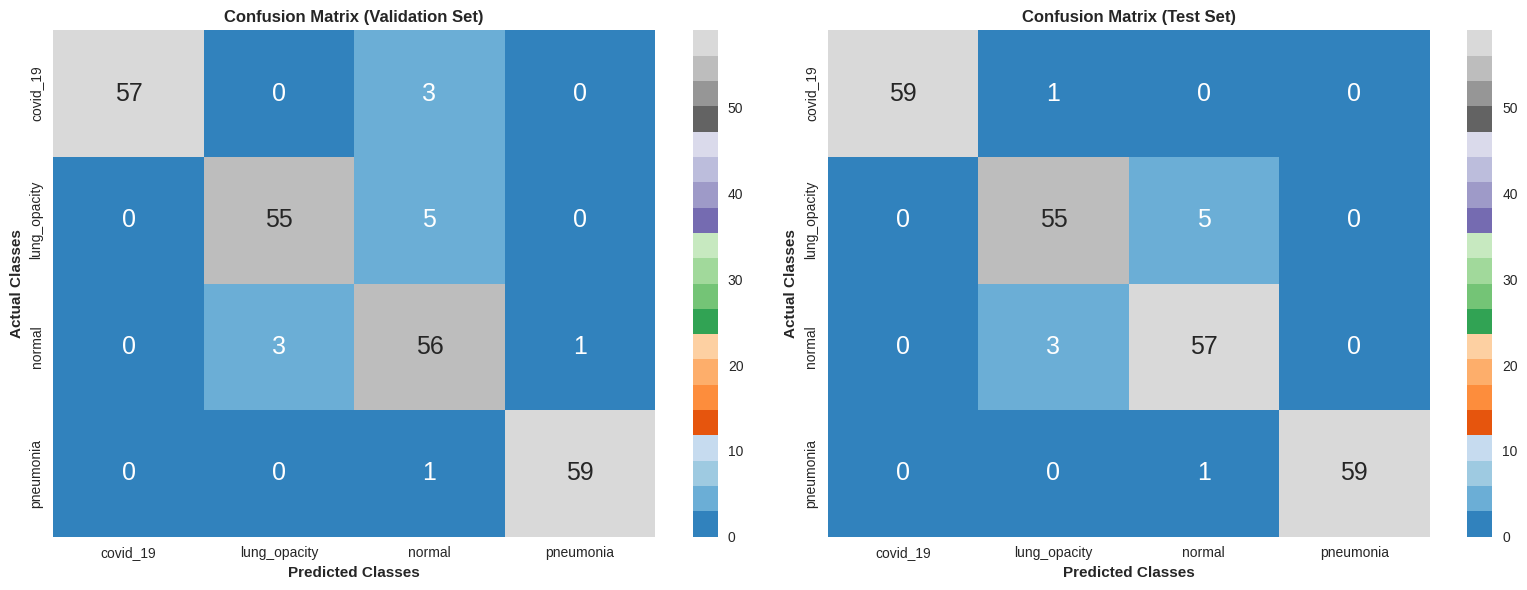

In [ ]:
val_confmat = utils.get_confmat(val_set.targets, "fill here")
test_confmat = utils.get_confmat(test_set.targets, "fill here")
plot_confmat(val_confmat, test_confmat, train_set.classes, f'{type(vgg16).__name__.lower()}')

In [ ]:
results = utils.get_results(test_confmat, test_set.classes)
results

{'covid_19': [0.9956709956709957, 1.0, 0.9833333333333333, 0.9915966386554621],
 'lung_opacity': [0.9623430962343096,
  0.9322033898305084,
  0.9166666666666666,
  0.9243697478991596],
 'normal': [0.9623430962343096, 0.9047619047619048, 0.95, 0.9268292682926829],
 'pneumonia': [0.9956709956709957,
  1.0,
  0.9833333333333333,
  0.9915966386554621]}

# Unveiling Model Decisions with Grad-CAM

Grad-CAM, short for Gradient-weighted Class Activation Mapping, is a powerful interpretability tool that provides insights into the inner workings of Convolutional Neural Networks (CNNs). In medical imaging, understanding the model's focus is crucial for diagnosis verification and gaining clinician trust.

![im](./assets/grad1.png)
![im](./assets/grad2.png)

## Understanding Grad-CAM

- **Purpose**: Grad-CAM aids in illuminating the "why" behind a model's decision, offering a heatmap visualization of the areas within an image that are influential in the model's prediction process.
- **Process**: It leverages the gradients flowing into the final convolutional layer of a CNN to understand each neuron's importance for a decision of interest. These gradients are then mapped back onto the input space, producing a heatmap corresponding to the significant regions for the prediction.
- **Transparency and Trust**: By revealing which parts of an image the model is focusing on to make a decision, Grad-CAM demystifies the CNN's operation, fostering transparency and trust in its diagnostic recommendations.

## Grad-CAM in Radiology

For the radiologist, Grad-CAM is a step towards explainable AI in medical diagnostics. It can be particularly enlightening when applied to chest X-ray analysis:

- **Highlighting Pathological Features**: Grad-CAM heatmaps can highlight areas of a chest X-ray that signify pathological features, such as opacities or consolidations associated with conditions like COVID-19.
- **Educational Value**: These visualizations serve as an educational tool, enabling radiologists to correlate the CNN's findings with their knowledge and experience, thus reinforcing the learning process.
- **Clinical Relevance**: Grad-CAM can be instrumental in validating the model's focus, ensuring that it aligns with clinically relevant features in the image rather than artifacts or noise.

This section of the workshop will dive into Grad-CAM's methodology and its application in the context of COVID-19 chest X-ray classification. Participants will gain practical experience in interpreting Grad-CAM heatmaps, enriching their understanding of how AI models can complement their expertise in diagnosing and understanding the disease manifestations on radiological images.


In [ ]:
# @title
# Select an X-ray image and its true label from the test set using an index.
# The chosen image will be used for visualization of class activation maps (CAMs).
index = 88
image, label = test_set[index]

# Retrieve the class names corresponding to the true label and the predicted labels from each model
# for the selected image. This aids in understanding the model's predictions in human-readable terms.
label_name = [
    test_set.classes[label],  # True label
    test_set.classes[vgg_preds[index]],  # Prediction from VGG16
    test_set.classes[resnet_preds[index]],  # Prediction from ResNet18
    test_set.classes[densenet_preds[index]]  # Prediction from DenseNet121
]

# Prepare the image for the model by adding a batch dimension and transferring it to the same device as the model.
image = image.unsqueeze(dim=0).to(device)

# Initialize the Grad-CAM object for VGG16 and generate the CAM for the selected image and its true label.
# The target layer is the final convolutional layer of the VGG16 model.
cam_obj = GradCAM(model=vgg16, target_layer=vgg16.features[-1])
_, vgg_cam = cam_obj(image, label)

# Repeat the process with the ResNet18 model, targeting the final layer of the model's fourth layer block.
cam_obj = GradCAM(model=resnet18, target_layer=resnet18.layer4[-1])
_, res_cam = cam_obj(image, label)

# Repeat again for the DenseNet121 model, targeting its last convolutional layer.
cam_obj = GradCAM(model=densenet121, target_layer=densenet121.features[-1])
_, dense_cam = cam_obj(image, label)

# Utilize a custom function to plot the Grad-CAM visualizations for the selected image.
# This visual comparison helps in interpreting the focus areas of different models for the given X-ray image.
plot_gradcam(image, label_name, vgg_cam, res_cam, dense_cam)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1359: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


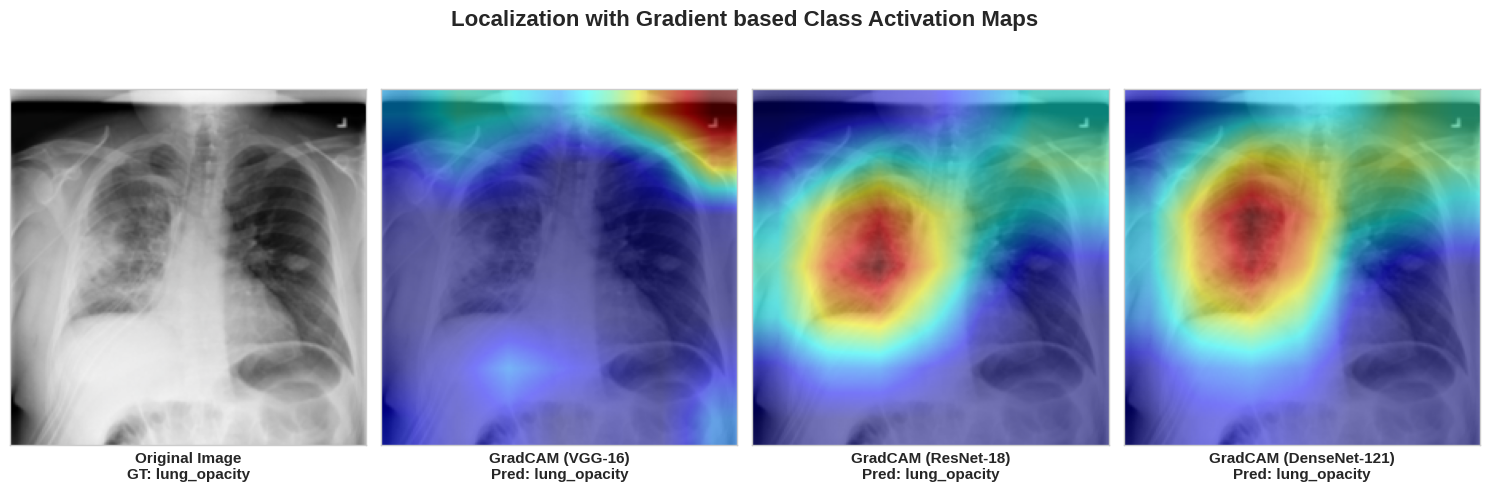

In [ ]:
# Select an X-ray image and its true label from the test set using an index.
# The chosen image will be used for visualization of class activation maps (CAMs).
index = 88
image, label = test_set[index]

# Retrieve the class names corresponding to the true label and the predicted labels from each model
# for the selected image. This aids in understanding the model's predictions in human-readable terms.
label_name = [
    test_set.classes[label],  # True label
    test_set.classes[vgg_preds[index]],  # Prediction from VGG16
    test_set.classes[resnet_preds[index]],  # Prediction from ResNet18
    test_set.classes[densenet_preds[index]]  # Prediction from DenseNet121
]

# Prepare the image for the model by adding a batch dimension and transferring it to the same device as the model.
image = image.unsqueeze(dim=0).to(device)

# Initialize the Grad-CAM object for VGG16 and generate the CAM for the selected image and its true label.
# The target layer is the final convolutional layer of the VGG16 model.
cam_obj = GradCAM(model=vgg16, target_layer=vgg16.features[-1])
_, vgg_cam = cam_obj(image, label)

# Repeat the process with the ResNet18 model, targeting the final layer of the model's fourth layer block.
cam_obj = GradCAM(model=resnet18, target_layer=resnet18.layer4[-1])
_, res_cam = cam_obj(image, label)

# Repeat again for the DenseNet121 model, targeting its last convolutional layer.
cam_obj = GradCAM(model=densenet121, target_layer=densenet121.features[-1])
_, dense_cam = cam_obj(image, label)

# Utilize a custom function to plot the Grad-CAM visualizations for the selected image.
# This visual comparison helps in interpreting the focus areas of different models for the given X-ray image.
plot_gradcam(image, label_name, "fill here", "fill here", "fill here")
